<a href="https://colab.research.google.com/github/AlirezaSamari/Deep-Learning-with_PyTorch/blob/main/1_4_linear_regression_train_valid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from torch import nn, optim
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset, DataLoader

In [2]:
class Data(Dataset):
  def __init__(self, Train=True):
    self.x = torch.linspace(0, 6, 60, requires_grad = True).view(-1, 1)
    self.y = 2*self.x +1 + 0.2*torch.randn(self.x.size())
    self.len = self.x.shape[0]
    if Train==True:
      self.y[0] = -2
      self.y[50:55] = 20

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

In [3]:
train_data = Data(Train = True)
valid_data = Data(Train = False)

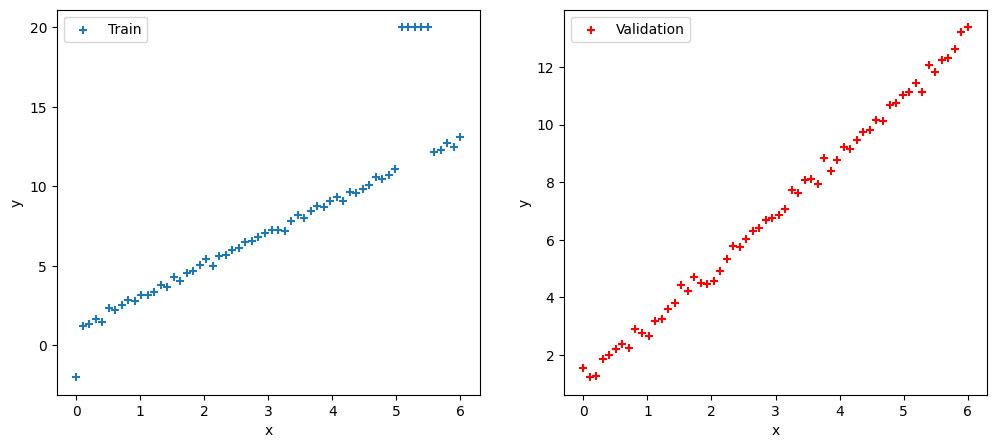

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(train_data.x.detach().numpy(), train_data.y.detach().numpy(), marker='+', label='Train')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].scatter(valid_data.x.detach().numpy(), valid_data.y.detach().numpy(), marker='+', label='Validation', color = 'red')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

axs[0].legend()
axs[1].legend()
plt.show()

In [5]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super(LR, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    return self.linear(x)

In [6]:
criterion = nn.MSELoss()
dataset_train = Data()
trainloader = DataLoader(dataset_train, batch_size=10)

In [7]:
learning_rates = [0.1, 0.01, 1e-3, 1e-4, 1e-5]
loss_of_lrs_train = []
loss_of_lrs_val = []
def training_model(epochs, learning_rate):
  for idx, lr in enumerate(learning_rate):
    model = LR(1, 1)
    optimizer = optim.SGD(model.parameters(), lr = lr)
    for epoch in range(epochs):
      for x, y in trainloader:
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()

    y_hat_train = model(train_data.x)
    y_hat_val = model(valid_data.y)
    loss_lr_train = criterion(y_hat_train, train_data.y)
    loss_lr_val = criterion(y_hat_val, valid_data.y)
    loss_of_lrs_train.append([lr, loss_lr_train.detach().numpy()])
    loss_of_lrs_val.append([lr, loss_lr_val.detach().numpy()])
  plt.plot(np.array(loss_of_lrs_train)[:,0], np.array(loss_of_lrs_train)[:,1], label = 'Train')
  plt.plot(np.array(loss_of_lrs_val)[:,0], np.array(loss_of_lrs_val)[:,1], label = 'Validation')
  plt.xlabel('lr')
  plt.xscale('log')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

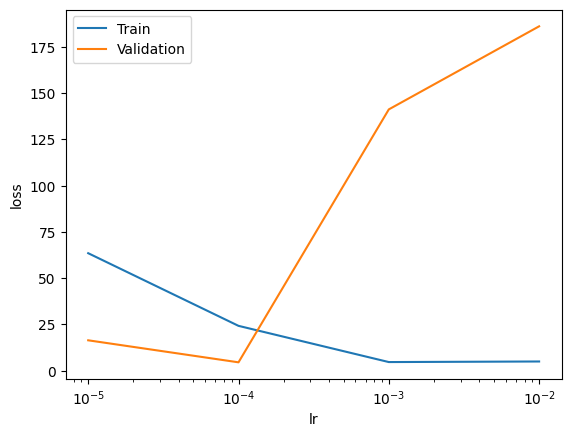

In [8]:
training_model(epochs= 40, learning_rate=learning_rates)